In [1]:
import pandas as pd
import numpy as np

In [2]:
#read txt file
molm13 = pd.read_csv('GSE217195_counts_Molm13.txt', sep="\t") 
print(molm13.shape)
molm13.head()


(57992, 12)


,gene_symbol,seqnames,start,end,width,strand,gene_id,total_exon_length,Sample_44527_C1_S00,Sample_44528_C2_S00,Sample_44529_91_S00,Sample_44530_92_S00
0,TSPAN6,chrX,100627109,100639991,12883,-,ENSG00000000003,4535,0,0,0,1
1,TNMD,chrX,100584802,100599885,15084,+,ENSG00000000005,1610,0,0,0,0
2,DPM1,chr20,50934867,50958555,23689,-,ENSG00000000419,1207,1465,1434,899,960
3,SCYL3,chr1,169849631,169894267,44637,-,ENSG00000000457,6883,621,591,828,982
4,C1orf112,chr1,169662007,169854080,192074,+,ENSG00000000460,5967,1177,1083,522,621


In [3]:
#select sample columns
counts = molm13[["gene_id", "Sample_44527_C1_S00", "Sample_44528_C2_S00", "Sample_44529_91_S00", "Sample_44530_92_S00" ]]
counts = counts.set_index('gene_id')
print(counts.shape)
counts.head()


(57992, 4)


,Sample_44527_C1_S00,Sample_44528_C2_S00,Sample_44529_91_S00,Sample_44530_92_S00
gene_id,,,,
ENSG00000000003,0,0,0,1
ENSG00000000005,0,0,0,0
ENSG00000000419,1465,1434,899,960
ENSG00000000457,621,591,828,982
ENSG00000000460,1177,1083,522,621


In [4]:
# keep genes with count >= 10 in at least 50% of samples
min_samples = int(0.5 * counts.shape[1])

counts = counts[(counts >= 10).sum(axis=1) >= min_samples]

print(counts.shape)
counts.head()


(16601, 4)


,Sample_44527_C1_S00,Sample_44528_C2_S00,Sample_44529_91_S00,Sample_44530_92_S00
gene_id,,,,
ENSG00000000419,1465,1434,899,960
ENSG00000000457,621,591,828,982
ENSG00000000460,1177,1083,522,621
ENSG00000000938,100,102,160,196
ENSG00000000971,30,27,54,72


In [5]:
#transposed df 
counts = counts.T 
counts


gene_id,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000283199,ENSG00000283312,ENSG00000283341,ENSG00000283390,ENSG00000283415,ENSG00000283491,ENSG00000283652,ENSG00000283674,ENSG00000283689,ENSG00000283696
Sample_44527_C1_S00,1465,621,1177,100,30,1684,615,2028,50,565,...,36,10,22,63,19,10,666,10,11,25
Sample_44528_C2_S00,1434,591,1083,102,27,1631,556,1976,51,447,...,35,5,15,50,21,10,678,18,18,46
Sample_44529_91_S00,899,828,522,160,54,1253,273,1622,73,856,...,54,24,36,38,7,17,662,5,17,39
Sample_44530_92_S00,960,982,621,196,72,1384,360,1899,56,924,...,45,20,28,72,7,11,754,4,23,41


In [6]:
#create your metadata
metadata = pd.DataFrame(zip(counts.index, ['WT','WT','PRMT9 Knockdown','PRMT Knockdown']), 
                        columns = ['Sample','Condition'])
metadata = metadata.set_index('Sample')

metadata


,Condition
Sample,
Sample_44527_C1_S00,WT
Sample_44528_C2_S00,WT
Sample_44529_91_S00,PRMT9 Knockdown
Sample_44530_92_S00,PRMT Knockdown


In [7]:
from pydeseq2.dds import DeseqDataSet # %pip install pydeseq2
from pydeseq2.ds import DeseqStats

# Create a pyDESeq2 object
dds = DeseqDataSet(counts=counts,         #count data file .csv, txt, etc.
            metadata=metadata,            #samples what we used
            design_factors="Condition")   #sample condition labeled data

dds


C:\Users\ayseg\AppData\Local\Temp\ipykernel_22956\687059424.py:5: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts,         #count data file .csv, txt, etc.


AnnData object with n_obs × n_vars = 4 × 16601
    obs: 'Condition'
    obsm: 'design_matrix'

In [8]:
#deseq2(): This function typically performs the main analysis, calculating differential expression between conditions using the Negative Binomial GLM (Generalized Linear Model) approach implemented in DESeq2.
#The dds.deseq2() function would run the DESeq2 analysis on the dds object, generating results such as differential expression statistics, fold changes, p-values, and adjusted p-values.

dds.deseq2() 


Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.53 seconds.

Fitting dispersion trend curve...
... done in 0.57 seconds.

C:\Users\ayseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydeseq2\dds.py:548: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 3.74 seconds.

Fitting LFCs...
... done in 2.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [9]:
#get statistical result
stat_res = DeseqStats(dds, n_cpus=8 ,contrast = ('Condition', 'PRMT Knockdown', 'WT'))
stat_res.summary()


Running Wald tests...


Log2 fold change & Wald test p-value: Condition PRMT Knockdown vs WT
                    baseMean  log2FoldChange     lfcSE      stat  \
gene_id                                                            
ENSG00000000419  1186.167588       -0.685707  0.120027 -5.712952   
ENSG00000000457   752.001915        0.605498  0.146683  4.127931   
ENSG00000000460   846.934680       -0.954121  0.141988 -6.719723   
ENSG00000000938   138.789692        0.864803  0.336053  2.573409   
ENSG00000000971    45.405560        1.246727  0.586198  2.126803   
...                      ...             ...       ...       ...   
ENSG00000283491    12.083045        0.046021  1.144260  0.040219   
ENSG00000283652   687.596039        0.074376  0.154641  0.480959   
ENSG00000283674     9.286389       -1.906309  1.395829 -1.365719   
ENSG00000283689    17.168970        0.568413  0.956310  0.594382   
ENSG00000283696    37.776156        0.109034  0.677635  0.160904   

                       pvalue          padj  


... done in 2.86 seconds.



In [10]:
#result was turned to a df
result_df = stat_res.results_df
result_df


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000000419,1186.167588,-0.685707,0.120027,-5.712952,1.110330e-08,9.463934e-08
ENSG00000000457,752.001915,0.605498,0.146683,4.127931,3.660420e-05,1.800023e-04
ENSG00000000460,846.934680,-0.954121,0.141988,-6.719723,1.820703e-11,2.196373e-10
ENSG00000000938,138.789692,0.864803,0.336053,2.573409,1.007021e-02,2.784542e-02
ENSG00000000971,45.405560,1.246727,0.586198,2.126803,3.343647e-02,7.830134e-02
...,...,...,...,...,...,...
ENSG00000283491,12.083045,0.046021,1.144260,0.040219,9.679184e-01,NaN
ENSG00000283652,687.596039,0.074376,0.154641,0.480959,6.305455e-01,7.599599e-01
ENSG00000283674,9.286389,-1.906309,1.395829,-1.365719,1.720272e-01,NaN


In [11]:
#select baseMean >=10 genes
result_df = result_df[result_df.baseMean >=10]
result_df


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000000419,1186.167588,-0.685707,0.120027,-5.712952,1.110330e-08,9.463934e-08
ENSG00000000457,752.001915,0.605498,0.146683,4.127931,3.660420e-05,1.800023e-04
ENSG00000000460,846.934680,-0.954121,0.141988,-6.719723,1.820703e-11,2.196373e-10
ENSG00000000938,138.789692,0.864803,0.336053,2.573409,1.007021e-02,2.784542e-02
ENSG00000000971,45.405560,1.246727,0.586198,2.126803,3.343647e-02,7.830134e-02
...,...,...,...,...,...,...
ENSG00000283415,13.479614,-1.607402,1.120649,-1.434349,1.514726e-01,NaN
ENSG00000283491,12.083045,0.046021,1.144260,0.040219,9.679184e-01,NaN
ENSG00000283652,687.596039,0.074376,0.154641,0.480959,6.305455e-01,7.599599e-01


In [12]:
# Create ENSG -> gene_symbol mapping from MOLM13 annotation
gene_map = (
    molm13[['gene_id', 'gene_symbol']]
    .drop_duplicates()
    .set_index('gene_id')
)

# Join DESeq2 results with gene symbols using ENSG IDs
result_df_annotated = result_df.join(gene_map, how='left')

# Make gene_symbol the index and remove ENSG IDs
result_df_annotated = (
    result_df_annotated
    .dropna(subset=['gene_symbol'])   # remove rows without gene symbols
    .reset_index(drop=True)           # drop ENSG ID index
    .set_index('gene_symbol')          # set gene_symbol as index
)

# Optional: reorder columns (gene_symbol is now index, so no need to add it as a column)
result_df_annotated = result_df_annotated[
    ['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
]

# Check result
result_df_annotated.head()


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_symbol,,,,,,
DPM1,1186.167588,-0.685707,0.120027,-5.712952,1.110330e-08,9.463934e-08
SCYL3,752.001915,0.605498,0.146683,4.127931,3.660420e-05,1.800023e-04
C1orf112,846.934680,-0.954121,0.141988,-6.719723,1.820703e-11,2.196373e-10
FGR,138.789692,0.864803,0.336053,2.573409,1.007021e-02,2.784542e-02
CFH,45.405560,1.246727,0.586198,2.126803,3.343647e-02,7.830134e-02


### DEG volcano plot

In [13]:
df = result_df_annotated.copy()

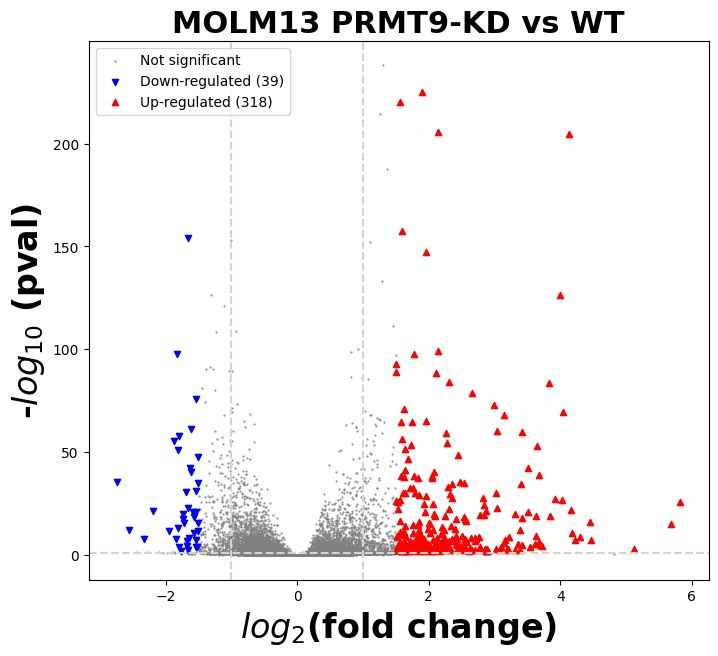

In [14]:
import matplotlib.pylab as plt
import numpy as np

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(8, 7))

# Scatter plot
plt.scatter(x=df['log2FoldChange'], y=df['padj'].apply(lambda x: -np.log10(x)), s=1, label="Not significant", color="grey", marker=".")

# highlight down- or up- regulated genes
down = df[(df['log2FoldChange'] <= -1.5) & (df['padj'] <= 0.01)]
up = df[(df['log2FoldChange'] >= 1.5) & (df['padj'] <= 0.01)]

down_count = len(down)
up_count = len(up)

plt.scatter(x=down['log2FoldChange'], y=down['padj'].apply(lambda x: -np.log10(x)), s=20, label=f"Down-regulated ({down_count})", color="blue", marker="v")
plt.scatter(x=up['log2FoldChange'], y=up['padj'].apply(lambda x: -np.log10(x)), s=20, label=f"Up-regulated ({up_count})", color="red", marker="^")

# Axes labels and lines
plt.xlabel("$log_{2}$(fold change)", size=24, weight='bold')
plt.ylabel("-$log_{10}$ (pval)", size=24, weight='bold')

plt.axvline(-1, color="lightgrey", linestyle="--")
plt.axvline(1, color="lightgrey", linestyle="--")
plt.axhline(1, color="lightgrey", linestyle="--")

# Remove grid
plt.grid(False)

# Legend
plt.legend(fontsize=14, prop={'weight': 'normal'}, loc='upper left')

# Title and display
plt.title("MOLM13 PRMT9-KD vs WT", weight='bold', fontsize=22)

# Save plot with highest DPI
plt.savefig('MOLM13_PRMT9_KDvsWT_plot.jpg', dpi=300)

plt.show()


### UP and Down regulated, significiant genes

In [15]:
# Selecting significant rows, you can change thresholds, like log2FC change > 1.5 or more 
significant = df[(df['padj'] < 0.01) & (abs(df['log2FoldChange']) > 1.5)].dropna()
significant

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_symbol,,,,,,
DBNDD1,62.541059,1.638419,0.507404,3.229024,1.242133e-03,4.404364e-03
ETV1,276.156953,1.846815,0.244859,7.542347,4.615890e-14,7.134930e-13
ALDH3B1,955.961670,1.508596,0.135295,11.150387,7.129592e-29,3.159637e-27
CEACAM21,85.357359,2.269095,0.443230,5.119450,3.064281e-07,2.135389e-06
TKTL1,35.506328,2.758424,0.744200,3.706563,2.100911e-04,8.829035e-04
...,...,...,...,...,...,...
RP11-467L13.7,49.871756,1.859031,0.572381,3.247888,1.162649e-03,4.157491e-03
HIST1H3H,49.227873,1.941629,0.578154,3.358325,7.841624e-04,2.907704e-03
RP11-568J23.2,78.170765,1.928533,0.463509,4.160728,3.172350e-05,1.576930e-04


In [16]:
# Create a list from the 'Symbol' column of the DataFrame 'significant'
significant.reset_index(inplace=True)
significant_list = significant['gene_symbol'].dropna().tolist()

# Display the list
len (significant_list)


357

In [17]:
# Selecting specific columns and dropping missing values
ranking_significant = significant[["gene_symbol", "stat"]].dropna()

# Sorting by the 'stat' column in ascending order
ranking_significant = ranking_significant.sort_values("stat", ascending=True)

# Dropping duplicate rows based on the 'Symbol' column
ranking_significant = ranking_significant.drop_duplicates("gene_symbol")

# Displaying the resulting DataFrame
ranking_significant

,gene_symbol,stat
210,HMGB2,-26.792624
238,VAT1L,-21.357525
143,PSAT1,-18.820638
172,ITGB1,-16.946860
53,PRELID3B,-16.487280
...,...,...
81,TBC1D30,27.094272
79,OAS2,30.841477
183,CD109,30.894969
339,TXNIP,32.006415


In [18]:
dds.layers['normed_counts'] #The 'normed_counts' layer likely contains these normalized expression counts for different genes across different samples.
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts']) #This transformation is commonly applied to RNA-seq count data to stabilize variance and handle values close to zero effectively. The result is then assigned to a new layer named 'log1p' within the dds object.
dds


AnnData object with n_obs × n_vars = 4 × 16601
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [19]:
#This variable now contains the expression data (counts or other measurements) for only the significant genes identified in your analysis.
dds_sigs = dds[:, significant.index] 
dds_sigs


View of AnnData object with n_obs × n_vars = 4 × 357
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [20]:
#In summary, the code snippet constructs a DataFrame named grapher from the expression data of significant genes stored in the dds_sigs object. 
grapher = pd.DataFrame(dds_sigs.layers["log1p"].T,
                      index=dds_sigs.var_names, columns=dds_sigs.obs_names)
grapher



Sample,Sample_44527_C1_S00,Sample_44528_C2_S00,Sample_44529_91_S00,Sample_44530_92_S00
gene_id,,,,
ENSG00000000419,7.265922,7.286500,6.865319,6.801355
ENSG00000000457,6.408592,6.401069,6.783138,6.823988
ENSG00000000460,7.047207,7.005989,6.322456,6.366360
ENSG00000000938,4.590977,4.652152,5.144017,5.216863
ENSG00000000971,3.410396,3.349173,4.069214,4.224713
...,...,...,...,...
ENSG00000029363,9.127691,9.160615,8.932803,8.942276
ENSG00000029364,7.137254,7.158031,7.233064,7.232477
ENSG00000029534,2.867355,2.849779,3.356565,3.461696


In [21]:
# ENSG -> gene_symbol mapping
gene_map = (
    molm13[['gene_id', 'gene_symbol']]
    .drop_duplicates()
    .set_index('gene_id')
)

# Join grapher with gene symbols
grapher_with_symbols = grapher.join(gene_map, how='left')

# Drop rows without gene symbol and set gene_symbol as index
grapher_with_symbols = (
    grapher_with_symbols
    .dropna(subset=['gene_symbol'])
    .reset_index(drop=True)      # drop ENSG index
    .set_index('gene_symbol')    # gene_symbol as index
)

grapher_with_symbols


,Sample_44527_C1_S00,Sample_44528_C2_S00,Sample_44529_91_S00,Sample_44530_92_S00
gene_symbol,,,,
DPM1,7.265922,7.286500,6.865319,6.801355
SCYL3,6.408592,6.401069,6.783138,6.823988
C1orf112,7.047207,7.005989,6.322456,6.366360
FGR,4.590977,4.652152,5.144017,5.216863
CFH,3.410396,3.349173,4.069214,4.224713
...,...,...,...,...
BCLAF1,9.127691,9.160615,8.932803,8.942276
SLC39A9,7.137254,7.158031,7.233064,7.232477
ANK1,2.867355,2.849779,3.356565,3.461696


### Clustered Heatmap

When you set z_score=0, as you did in your sns.clustermap call, Seaborn standardizes the data along the rows, meaning it subtracts the mean and divides by the standard deviation for each row. This standardization ensures that each row (or column, depending on the z_score parameter) has a mean of 0 and a standard deviation of 1.

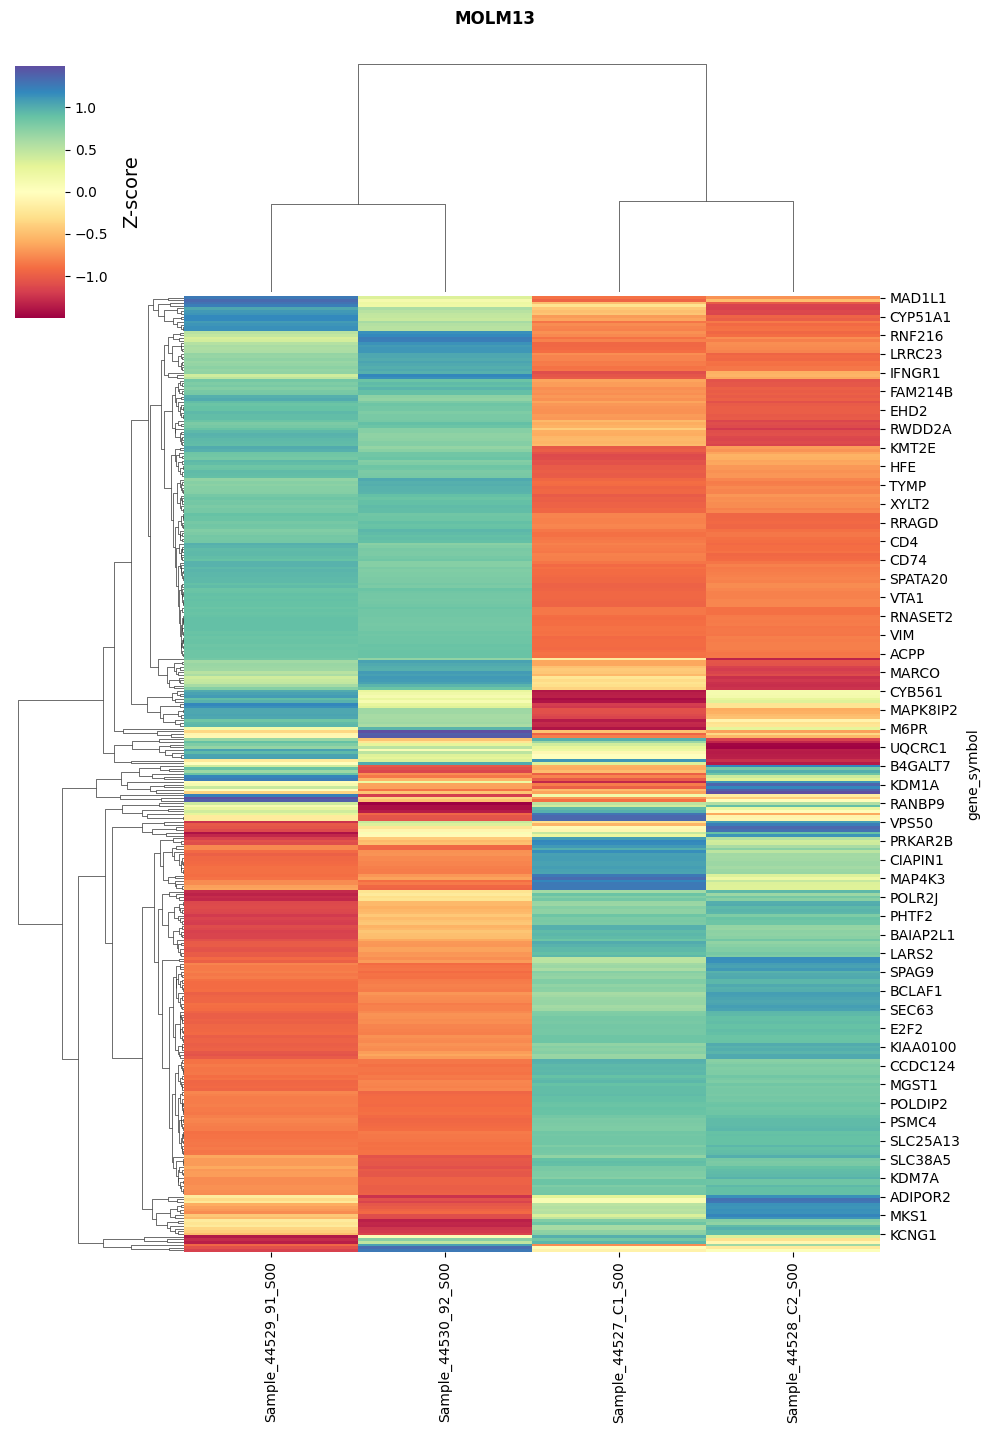

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTANT:
# clustermap requires a numeric matrix
# gene symbols must be the index, not a column
grapher_numeric = grapher_with_symbols.select_dtypes(include='number')

# Run clustermap (row-wise z-score normalization)
ax = sns.clustermap(
    grapher_numeric,
    z_score=0,              # normalize across rows (genes)
    cmap='Spectral',
    figsize=(10, 14)
)

# Add label to color bar
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label('Z-score', rotation=-270, labelpad=10, fontsize=14)

# Add title
ax.fig.suptitle('MOLM13', y=1.02, weight='bold')

plt.show()


## DEG up and down regulated genes

### up regulated genes

In [23]:
upregulated_genes = df[(df['log2FoldChange'] > 1.5 ) & (df.padj < 0.01)].dropna()
upregulated_genes.reset_index(inplace=True)
#you can save it 
#upregulated_genes.to_csv("molm13_up_genes.csv", index=False)
upregulated_genes

,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,DBNDD1,62.541059,1.638419,0.507404,3.229024,1.242133e-03,4.404364e-03
1,ETV1,276.156953,1.846815,0.244859,7.542347,4.615890e-14,7.134930e-13
2,ALDH3B1,955.961670,1.508596,0.135295,11.150387,7.129592e-29,3.159637e-27
3,CEACAM21,85.357359,2.269095,0.443230,5.119450,3.064281e-07,2.135389e-06
4,TKTL1,35.506328,2.758424,0.744200,3.706563,2.100911e-04,8.829035e-04
...,...,...,...,...,...,...,...
313,RP11-467L13.7,49.871756,1.859031,0.572381,3.247888,1.162649e-03,4.157491e-03
314,HIST1H3H,49.227873,1.941629,0.578154,3.358325,7.841624e-04,2.907704e-03
315,RP11-568J23.2,78.170765,1.928533,0.463509,4.160728,3.172350e-05,1.576930e-04
316,BISPR,162.464175,1.638997,0.335508,4.885117,1.033675e-06,6.653458e-06


In [24]:
# Create a pandas DataFrame with gene symbols and log2FoldChange
up_genes_list = upregulated_genes["gene_symbol"].to_list()
up_genes_list
len(up_genes_list)

318

In [25]:
ranking_UP = upregulated_genes[["gene_symbol", "stat"]].dropna().sort_values("stat", ascending = False)
ranking_UP = ranking_UP.drop_duplicates("gene_symbol")
ranking_UP

,gene_symbol,stat
95,P4HA1,32.365469
302,TXNIP,32.006415
163,CD109,30.894969
72,OAS2,30.841477
74,TBC1D30,27.094272
...,...,...
258,TMEM221,2.989558
45,HMOX1,2.987392
282,SEPT7-AS1,2.986130
278,ZMIZ1-AS1,2.966736


### down regulated genes

In [26]:
downregulated_genes = df[(df['log2FoldChange'] < -1.5) & (df.padj < 0.01)].dropna()
downregulated_genes.reset_index(inplace=True)
#you can save it 
#downregulated_genes.to_csv("molm13_down_genes.csv", index=False)
downregulated_genes


,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,E2F2,250.208284,-1.532899,0.261796,-5.855321,4.760885e-09,4.284505e-08
1,NCKAP1,215.552273,-1.673858,0.290601,-5.759993,8.411739e-09,7.322955e-08
2,MCM10,1355.523912,-1.819074,0.117854,-15.434948,9.527718e-54,1.318510e-51
3,ASNS,1110.811123,-1.541839,0.127068,-12.133976,6.977726e-34,4.077939e-32
4,WDR62,433.453287,-1.725849,0.202835,-8.508618,1.760180e-17,3.616257e-16
5,PRELID3B,1665.851538,-1.793250,0.108766,-16.487280,4.528858e-61,7.908788e-59
6,RAD51AP1,733.667393,-1.546105,0.154997,-9.975072,1.959602e-23,6.359603e-22
7,PASK,629.861234,-1.515077,0.176050,-8.605957,7.568272e-18,1.604320e-16
8,ICMT,1829.643935,-1.507284,0.100975,-14.927359,2.187604e-50,2.719488e-48
9,GINS2,485.029056,-1.743701,0.192511,-9.057653,1.332875e-19,3.226394e-18


In [27]:
# Create a pandas DataFrame with gene symbols and log2FoldChange
down_genes_list = downregulated_genes["gene_symbol"].to_list()
down_genes_list
len(down_genes_list)


39

In [28]:
ranking_DOWN = downregulated_genes[["gene_symbol", "stat"]].dropna().sort_values("stat", ascending = True)
ranking_DOWN = ranking_DOWN.drop_duplicates("gene_symbol")
ranking_DOWN

,gene_symbol,stat
22,HMGB2,-26.792624
26,VAT1L,-21.357525
11,PSAT1,-18.820638
15,ITGB1,-16.946860
5,PRELID3B,-16.487280
34,VKORC1L1,-16.148254
2,MCM10,-15.434948
8,ICMT,-14.927359
25,ESCO2,-14.053841
14,NDUFS6,-13.792509


# GSEA - ENRICHR 

In [29]:
import gseapy as gp
from gseapy.plot import gseaplot

#you can check other genesets using this code: 
#gp.get_library_name()

In [30]:
enr = gp.enrichr(gene_list = significant_list,    
            gene_sets=['MSigDB_Hallmark_2020'], #Oncogenic 
            organism='human', # don't forget to set organism 
            outdir=None, # don't write to disk
                )
                 
# obj.results stores all results
enr.results.head(5)
                

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Interferon Alpha Response,23/97,1.023195e-19,4.297418e-18,0,0,18.210350,796.269151,LGALS3BP;IFITM1;SAMD9L;RSAD2;UBA7;STAT2;IFI44;...
1,MSigDB_Hallmark_2020,Interferon Gamma Response,22/200,1.131885e-11,2.376958e-10,0,0,7.181452,181.005286,LGALS3BP;SAMD9L;RSAD2;STAT2;MX2;IFI44;UBE2L6;I...
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,18/200,2.152543e-08,3.013560e-07,0,0,5.677623,100.232936,PPP1R15A;BTG2;BCL2A1;LAMB3;SERPINE1;TRAF1;SAT1...
3,MSigDB_Hallmark_2020,Inflammatory Response,16/200,6.562948e-07,6.891096e-06,0,0,4.962132,70.644163,IFITM1;BTG2;PTGIR;SERPINE1;ADM;OSMR;RNF144B;CX...
4,MSigDB_Hallmark_2020,KRAS Signaling Up,15/200,3.281999e-06,2.756879e-05,0,0,4.613087,58.249714,PPP1R15A;FCER1G;JUP;VWA5A;EMP1;F13A1;ETV1;TRAF...


In [31]:
# Filter and sort results
filtered_results = enr.results[
    (enr.results['Adjusted P-value'] <= 0.05) &
    (enr.results['Combined Score'] >= 30) &
    (enr.results['Genes'].apply(lambda x: len(x.split(';')) >= 1))
]

DEPs_pathways = filtered_results.sort_values(by='Combined Score', ascending=False)

pd.set_option('display.max_colwidth', None)
DEPs_pathways.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Interferon Alpha Response,23/97,1.023195e-19,4.297418e-18,0,0,18.210350,796.269151,LGALS3BP;IFITM1;SAMD9L;RSAD2;UBA7;STAT2;IFI44;UBE2L6;IFIT3;IFI44L;IFIT2;OASL;HELZ2;IFIH1;CXCL10;OAS1;LPAR6;DHX58;EPSTI1;IRF7;TXNIP;GBP2;IRF9
1,MSigDB_Hallmark_2020,Interferon Gamma Response,22/200,1.131885e-11,2.376958e-10,0,0,7.181452,181.005286,LGALS3BP;SAMD9L;RSAD2;STAT2;MX2;IFI44;UBE2L6;IFIT1;IFIT3;IFI44L;IFIT2;OASL;HELZ2;IFIH1;CXCL10;OAS2;OAS3;DHX58;EPSTI1;IRF7;TXNIP;IRF9
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,18/200,2.152543e-08,3.013560e-07,0,0,5.677623,100.232936,PPP1R15A;BTG2;BCL2A1;LAMB3;SERPINE1;TRAF1;SAT1;IFIT2;RELB;NFKB2;IFIH1;CXCL10;IL1B;BCL3;TNFSF9;PTX3;SGK1;BIRC3
3,MSigDB_Hallmark_2020,Inflammatory Response,16/200,6.562948e-07,6.891096e-06,0,0,4.962132,70.644163,IFITM1;BTG2;PTGIR;SERPINE1;ADM;OSMR;RNF144B;CXCL10;AXL;RGS1;IL1B;C3AR1;IRF7;TNFSF9;NMUR1;ROS1
4,MSigDB_Hallmark_2020,KRAS Signaling Up,15/200,3.281999e-06,2.756879e-05,0,0,4.613087,58.249714,PPP1R15A;FCER1G;JUP;VWA5A;EMP1;F13A1;ETV1;TRAF1;CXCL10;GPNMB;IL1B;C3AR1;SPP1;PRELID3B;BIRC3


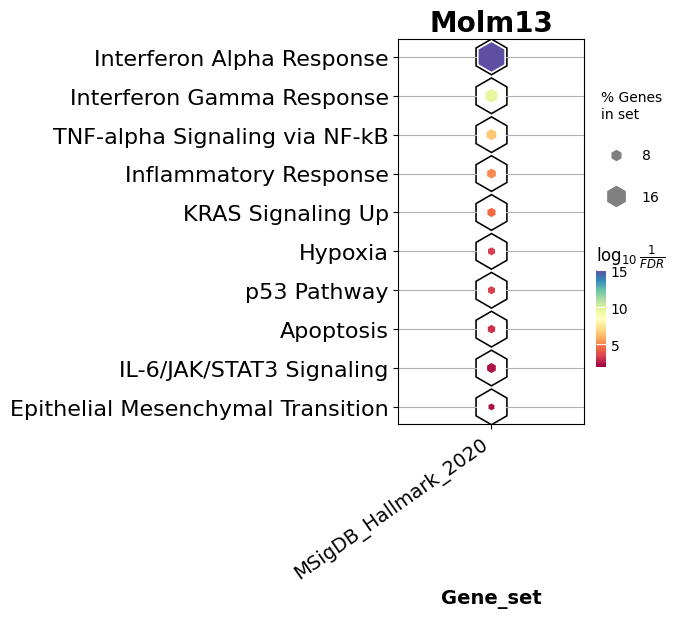

In [32]:
# simple plotting function
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=15,
              top_term=10,
              figsize=(3,5),
              title = "Molm13",
              xticklabels_rot=35, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              cmap = 'Spectral',
              marker='h',
             )

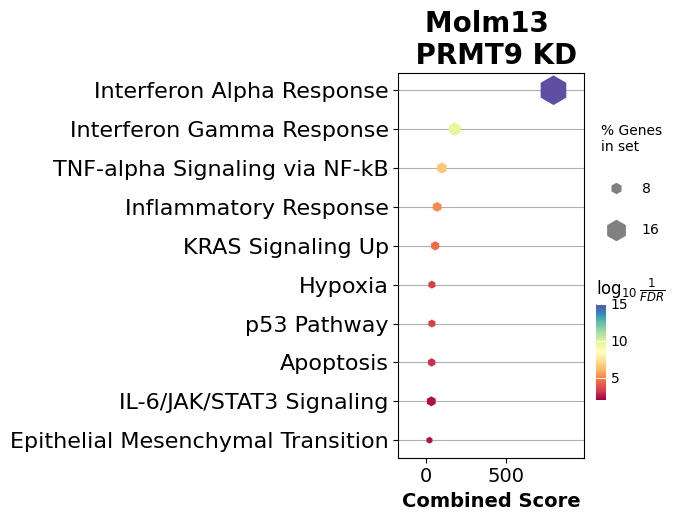

In [33]:
ax = dotplot(enr.results, title='Molm13 \n PRMT9 KD',cmap='Spectral', size=15, figsize=(3,5), marker ='h')


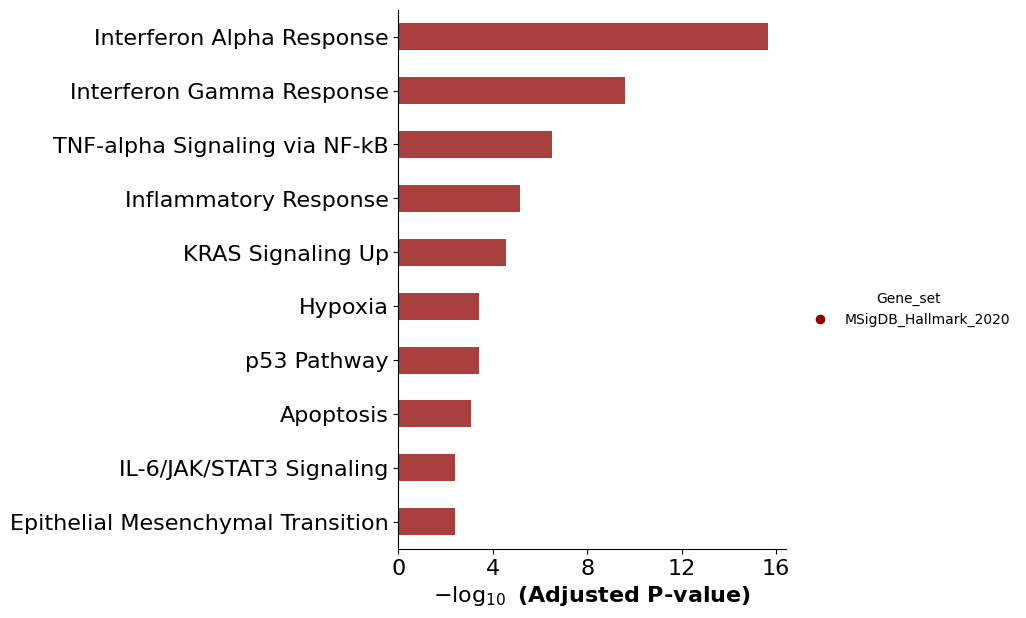

In [34]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(5,7),
              color=['darkred'] # set colors 
             )

In [35]:
#check genes in a Term/pathways
i = 0
genes = enr.res2d.Genes[i].split(";")
print (len(genes), enr.res2d.Term[i],"genes:","\n", genes)
print ('---------------------------------------------')
i = 1
genes = enr.res2d.Genes[i].split(";")
print(len(genes), enr.res2d.Term[i],"genes:","\n", genes)
print ('---------------------------------------------')


23 Interferon Alpha Response genes: 
 ['LGALS3BP', 'IFITM1', 'SAMD9L', 'RSAD2', 'UBA7', 'STAT2', 'IFI44', 'UBE2L6', 'IFIT3', 'IFI44L', 'IFIT2', 'OASL', 'HELZ2', 'IFIH1', 'CXCL10', 'OAS1', 'LPAR6', 'DHX58', 'EPSTI1', 'IRF7', 'TXNIP', 'GBP2', 'IRF9']
---------------------------------------------
22 Interferon Gamma Response genes: 
 ['LGALS3BP', 'SAMD9L', 'RSAD2', 'STAT2', 'MX2', 'IFI44', 'UBE2L6', 'IFIT1', 'IFIT3', 'IFI44L', 'IFIT2', 'OASL', 'HELZ2', 'IFIH1', 'CXCL10', 'OAS2', 'OAS3', 'DHX58', 'EPSTI1', 'IRF7', 'TXNIP', 'IRF9']
---------------------------------------------


# GSEA - PRERANK

In [36]:
pre_res = gp.prerank(rnk=ranking_significant,
                     gene_list = significant_list,
                     gene_sets=['Reactome_2022'], #Oncogenic
                     organism='Human',
                     seed=6, permutation_num=100)

#pre_res
#pre_res.res2d

In [37]:
# enrichment score(es)
# normalized enrichment score(nes)

out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes'],
               pre_res.results[term]['lead_genes'],
                
               ])

out_df = pd.DataFrame(out, columns = ['Term', 'fdr', 'es', 'nes', 'Lead_genes']).sort_values('fdr').reset_index(drop = True)
out_df.head(5)
#out_df.sort_values('nes')


,Term,fdr,es,nes,Lead_genes
0,Reactome_2022__Cytokine Signaling In Immune System R-HSA-1280215,0.014648,0.574457,1.889809,OAS2;TNFSF13B;IFIT2;STAT2;IFIT1;OAS1;ITGAM;IFIT3;CSF1R;GBP2;UBA7;OAS3;MX2;CXCL10;TNFSF9;NFKB2;IRF7;IFI6;OASL;IFITM1
1,Reactome_2022__Immune System R-HSA-168256,0.015625,0.550466,1.918807,TXNIP;OAS2;FCGR2B;TNFSF13B;ADGRE5;IFIT2;ALDOC;STAT2;IFIT1;OAS1;ITGAM;IFIT3;IFI16;CSF1R;NCF1;JAML;CD300A;GBP2;UBA7;OAS3;MX2;CXCL10;ALDH3B1;TNFSF9;IFIH1;NFKB2;IRF7;IFI6;OASL;IFITM1;SLC44A2
2,Reactome_2022__Interferon Alpha/Beta Signaling R-HSA-909733,0.017578,0.739696,1.956263,OAS2;IFIT2;STAT2;IFIT1;OAS1;IFIT3;GBP2;OAS3;MX2;IRF7;IFI6;OASL;IFITM1
3,Reactome_2022__Interferon Signaling R-HSA-913531,0.035156,0.701943,1.972537,OAS2;IFIT2;STAT2;IFIT1;OAS1;IFIT3;GBP2;UBA7;OAS3;MX2;IRF7;IFI6;OASL;IFITM1
4,Reactome_2022__Innate Immune System R-HSA-168249,0.241406,0.459685,1.468606,TXNIP;ADGRE5;ALDOC;ITGAM;IFI16;NCF1;CD300A;UBA7;ALDH3B1;IFIH1;NFKB2;IRF7;SLC44A2;ITGAX;RASGRP4;RELB;LGALS3;JUP


In [38]:
MOST_significant_genes = out_df[(out_df['fdr'] < 0.05) & (out_df.nes > 1.5)]
MOST_significant_genes.sort_values(by = 'nes', ascending=False)


,Term,fdr,es,nes,Lead_genes
3,Reactome_2022__Interferon Signaling R-HSA-913531,0.035156,0.701943,1.972537,OAS2;IFIT2;STAT2;IFIT1;OAS1;IFIT3;GBP2;UBA7;OAS3;MX2;IRF7;IFI6;OASL;IFITM1
2,Reactome_2022__Interferon Alpha/Beta Signaling R-HSA-909733,0.017578,0.739696,1.956263,OAS2;IFIT2;STAT2;IFIT1;OAS1;IFIT3;GBP2;OAS3;MX2;IRF7;IFI6;OASL;IFITM1
1,Reactome_2022__Immune System R-HSA-168256,0.015625,0.550466,1.918807,TXNIP;OAS2;FCGR2B;TNFSF13B;ADGRE5;IFIT2;ALDOC;STAT2;IFIT1;OAS1;ITGAM;IFIT3;IFI16;CSF1R;NCF1;JAML;CD300A;GBP2;UBA7;OAS3;MX2;CXCL10;ALDH3B1;TNFSF9;IFIH1;NFKB2;IRF7;IFI6;OASL;IFITM1;SLC44A2
0,Reactome_2022__Cytokine Signaling In Immune System R-HSA-1280215,0.014648,0.574457,1.889809,OAS2;TNFSF13B;IFIT2;STAT2;IFIT1;OAS1;ITGAM;IFIT3;CSF1R;GBP2;UBA7;OAS3;MX2;CXCL10;TNFSF9;NFKB2;IRF7;IFI6;OASL;IFITM1


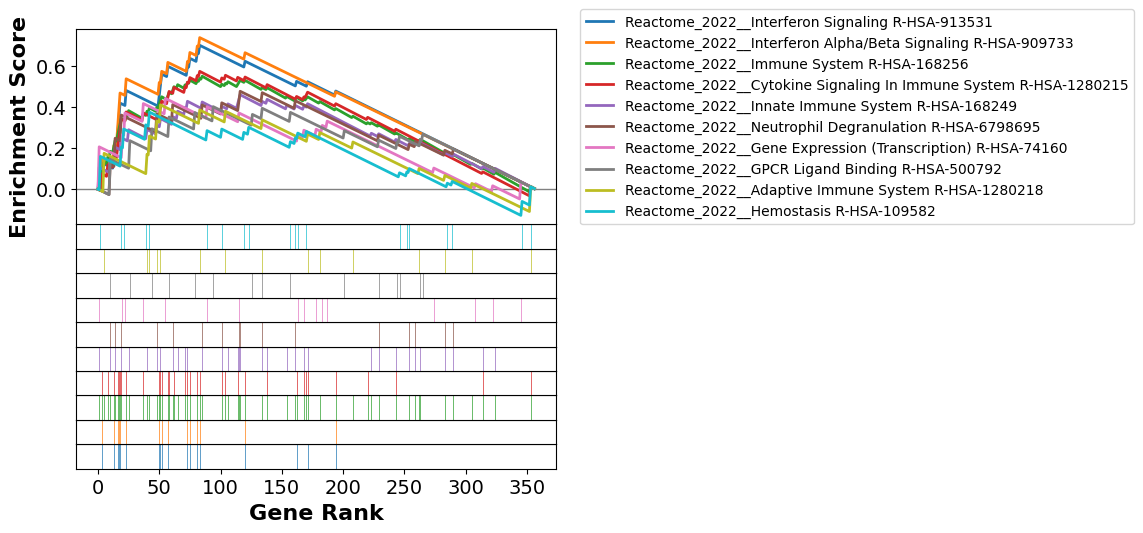

In [39]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms[:10], show_ranking=False, legend_kws={'loc': (1.05, 0)})


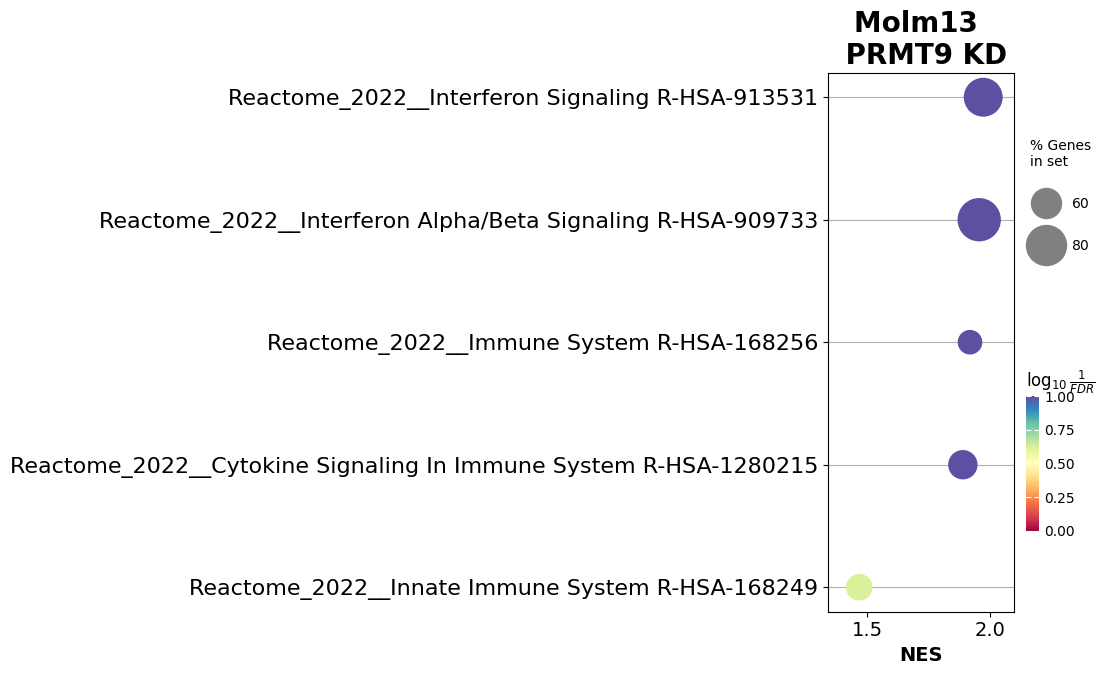

In [40]:
from gseapy import dotplot
from matplotlib import pyplot as plt
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='Molm13 \n PRMT9 KD',
             cmap = 'Spectral',
             #cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(3,7), cutoff=0.25, show_ring=False)

In [41]:
i = 0
genes = pre_res.res2d.Lead_genes[i].split(";")
print(pre_res.res2d.Term[i],":", "\n", genes)


Reactome_2022__Interferon Signaling R-HSA-913531 : 
 ['OAS2', 'IFIT2', 'STAT2', 'IFIT1', 'OAS1', 'IFIT3', 'GBP2', 'UBA7', 'OAS3', 'MX2', 'IRF7', 'IFI6', 'OASL', 'IFITM1']


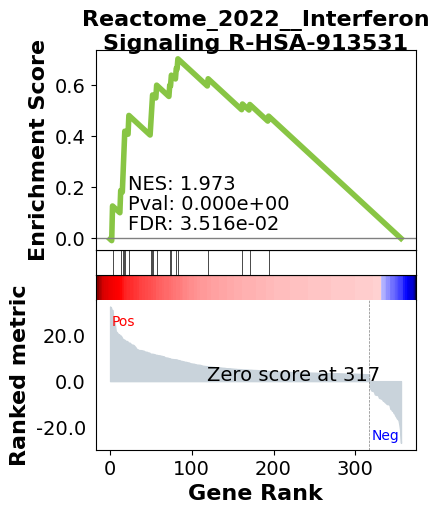

In [42]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[0])

# Enrichment map

In [43]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d)

In [44]:
import networkx as nx

In [45]:
# build graph
G = nx.from_pandas_edgelist(edges,
source='src_idx',
target='targ_idx',
edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

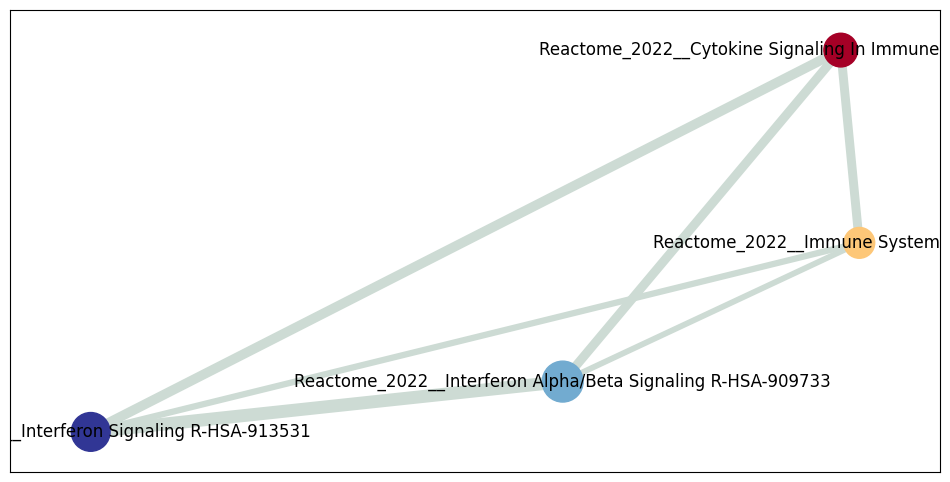

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))
# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
pos=pos,
cmap=plt.cm.RdYlBu,
node_color=list(nodes.NES),
node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
pos=pos,
labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
pos=pos,
width=list(map(lambda x: x*10, edge_weight)),
edge_color='#CDDBD4')
plt.show()